In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

# Define paths to the directories
train_dir = 'E:/Food_101 - Copy/Food_101/train'
validation_dir = 'E:/Food_101 - Copy/Food_101/test'

# Create dataset objects with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

# Train multiple instances of the VGG16 model with different input sizes
models = []
input_sizes = [(64, 64), (96, 96), (128, 128)]
for input_size in input_sizes:
    # Load pre-trained VGG16 model and remove top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_size + (3,))
    base_model.trainable = False  # Freeze the base model

    # Define input layer
    input_layer = Input(shape=input_size + (3,))

    # Get output from the base model
    x = base_model(input_layer, training=False)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(len(train_generator.class_indices), activation='softmax')(x)

    # Define the final model
    model = Model(inputs=input_layer, outputs=x)

    # Compile the model with a lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        train_generator,
        epochs=20,  # Increased epochs for better training
        validation_data=validation_generator,
        callbacks=[early_stopping]
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(validation_generator)
    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_accuracy}')


Found 5686 images belonging to 17 classes.
Found 2437 images belonging to 17 classes.
Epoch 1/20


C:\Users\FARHAN\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.0922 - loss: 3.0004 - val_accuracy: 0.2651 - val_loss: 2.4532
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 150s 839ms/step - accuracy: 0.2145 - loss: 2.4869 - val_accuracy: 0.3311 - val_loss: 2.2843
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 152s 849ms/step - accuracy: 0.2852 - loss: 2.3406 - val_accuracy: 0.3595 - val_loss: 2.1883
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 155s 868ms/step - accuracy: 0.3205 - loss: 2.2218 - val_accuracy: 0.3660 - val_loss: 2.1217
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 154s 859ms/step - accuracy: 0.3330 - loss: 2.1694 - val_accuracy: 0.3833 - val_loss: 2.0708
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 155s 868ms/step - accuracy: 0.3498 - loss: 2.0985 - val_accuracy: 0.3956 - val_loss: 2.0259
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 154s 857ms/step - accuracy: 0.3690 - loss: 2.0614 - val_accuracy: 0.4079 - val_loss: 1.9871
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 157s 879ms/step - accuracy: 0.3958 - loss: 1.9955 

ValueError: Input 0 of layer "functional_3" is incompatible with the layer: expected shape=(None, 96, 96, 3), found shape=(None, 64, 64, 3)

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define paths to the directories
train_dir = 'E:/Food_101 - Copy/Food_101/train'
validation_dir = 'E:/Food_101 - Copy/Food_101/test'

# Create dataset objects with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Load the VGG16 model with ImageNet weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze the base model

# Define the input layer
input_layer = Input(shape=(128, 128, 3))

# Get output from the base model
x = base_model(input_layer, training=False)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Define the final model
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Optionally: Save the model
model.save('vgg16_128_model.h5')


Found 5686 images belonging to 17 classes.
Found 2437 images belonging to 17 classes.
Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 775s 4s/step - accuracy: 0.1323 - loss: 2.8142 - val_accuracy: 0.3677 - val_loss: 2.1731 - learning_rate: 1.0000e-04
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 691s 4s/step - accuracy: 0.3071 - loss: 2.2672 - val_accuracy: 0.4313 - val_loss: 1.9246 - learning_rate: 1.0000e-04
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 577s 3s/step - accuracy: 0.3773 - loss: 2.0456 - val_accuracy: 0.4764 - val_loss: 1.7771 - learning_rate: 1.0000e-04
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1304s 7s/step - accuracy: 0.4159 - loss: 1.9027 - val_accuracy: 0.5051 - val_loss: 1.6859 - learning_rate: 1.0000e-04
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 597s 3s/step - accuracy: 0.4550 - loss: 1.8100 - val_accuracy: 0.5400 - val_loss: 1.6219 - learning_rate: 1.0000e-04
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.4613 - loss: 1.7218 - val_accuracy: 0.5396 - val_loss: 1.5681

Test Loss: 1.3380842208862305
Test Accuracy: 0.6060730218887329


Found 2437 images belonging to 17 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


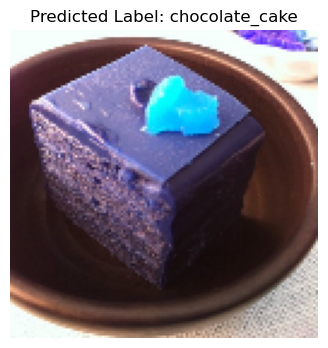


Softmax Outputs: [[1.5075910e-03 9.2883676e-01 2.1947196e-04 2.2942410e-03 6.2096296e-05
  1.2399277e-04 7.0508319e-04 3.3881486e-04 4.4046523e-05 1.6331187e-02
  1.0270514e-04 4.4551856e-04 3.2637749e-02 1.5296127e-03 1.2621935e-02
  8.3737534e-05 2.1155057e-03]]

Predicted Label Index: 1
Predicted Label: chocolate_cake


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Load the complete model
final_model = load_model('vgg16_128_model.h5')

# Define class labels for visualization and prediction
class_labels = {
    0: 'apple_pie',
    1: 'chocolate_cake',
    2: 'donuts',
    3: 'falafel',
    4: 'french_fries',
    5: 'hot_dog',
    6: 'ice_cream',
    7: 'nachos',
    8: 'onion_rings',
    9: 'pancakes',
    10: 'pizza',
    11: 'ravioli',
    12: 'samosa',
    13: 'spring_rolls',
    14: 'strawberry_shortcake',
    15: 'tacos',
    16: 'waffles'
}

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load test data
test_generator = test_datagen.flow_from_directory(
    directory='E:/Food_101 - Copy/Food_101/test',  # Replace with your test data directory
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Select a sample image for prediction
n = 100  # Example index, make sure it's within the range of your dataset
image_path = test_generator.filepaths[n]
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise ValueError(f"Image at path {image_path} could not be loaded.")

# Resize and normalize the image
image_resized = cv2.resize(image, (128, 128))
image_resized = image_resized.astype('float32') / 255.0  # Normalize image

# Prepare the image for prediction
image_input = np.expand_dims(image_resized, axis=0)  # Add batch dimension

# Predict using the model
y_pred = final_model.predict(image_input)

# Convert the predicted probabilities to labels
predicted_class_index = np.argmax(y_pred)
predicted_label = class_labels[predicted_class_index]

# Plot the resized image
plt.figure(figsize=[4, 4])
plt.title(f"Predicted Label: {predicted_label}")
plt.imshow(image_resized)
plt.axis('off')
plt.show()

print('\nSoftmax Outputs:', y_pred)
print('\nPredicted Label Index:', predicted_class_index)
print(f'Predicted Label: {predicted_label}')



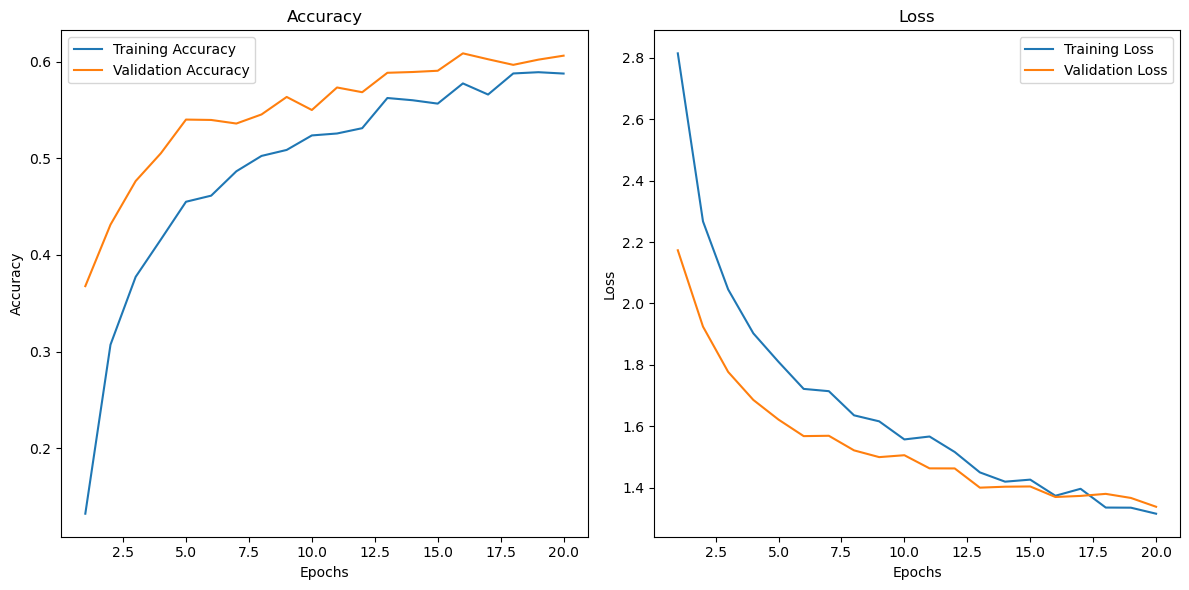

In [12]:
import matplotlib.pyplot as plt

# Manually specify the metrics from your training logs
epochs = list(range(1, 21))  # Since you trained for 20 epochs

# Training and validation accuracy values from the log
train_accuracy = [0.1323, 0.3071, 0.3773, 0.4159, 0.4550, 0.4613, 0.4865, 0.5024, 0.5086, 0.5236, 
                   0.5256, 0.5311, 0.5623, 0.5600, 0.5565, 0.5774, 0.5659, 0.5877, 0.5890, 0.5876]
val_accuracy = [0.3677, 0.4313, 0.4764, 0.5051, 0.5400, 0.5396, 0.5359, 0.5453, 0.5634, 0.5499, 
                 0.5732, 0.5683, 0.5884, 0.5892, 0.5905, 0.6085, 0.6024, 0.5966, 0.6020, 0.6061]

# Training and validation loss values from the log
train_loss = [2.8142, 2.2672, 2.0456, 1.9027, 1.8100, 1.7218, 1.7144, 1.6358, 1.6162, 1.5573, 
               1.5668, 1.5164, 1.4500, 1.4198, 1.4264, 1.3739, 1.3966, 1.3355, 1.3351, 1.3155]
val_loss = [2.1731, 1.9246, 1.7771, 1.6859, 1.6219, 1.5681, 1.5692, 1.5217, 1.4997, 1.5059, 
             1.4631, 1.4629, 1.4003, 1.4034, 1.4042, 1.3699, 1.3734, 1.3801, 1.3668, 1.3381]

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define paths to the directories
train_dir = 'E:/Food_101 - Copy/Food_101/train'
validation_dir = 'E:/Food_101 - Copy/Food_101/test'

# Create dataset objects with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Define and compile VGG16 model
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(len(train_generator.class_indices), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define and compile ResNet50 model
def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(len(train_generator.class_indices), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the models
vgg16_model = create_vgg16_model()
resnet50_model = create_resnet50_model()

print("Training VGG16 Model...")
vgg16_history = vgg16_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)]
)

print("Training ResNet50 Model...")
resnet50_history = resnet50_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)]
)

# Define the ensemble model
def create_ensemble_model(vgg16_model, resnet50_model):
    input1 = Input(shape=(128, 128, 3))
    input2 = Input(shape=(128, 128, 3))
    
    features1 = vgg16_model(base_model(input1))
    features1 = Flatten()(features1)
    
    features2 = resnet50_model(base_model(input2))
    features2 = Flatten()(features2)
    
    concatenated = Concatenate()([features1, features2])
    x = Dense(512, activation='relu')(concatenated)
    x = Dropout(0.5)(x)
    x = Dense(len(train_generator.class_indices), activation='softmax')(x)
    
    ensemble_model = Model(inputs=[input1, input2], outputs=x)
    ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
    return ensemble_model

# Create and train the ensemble model
ensemble_model = create_ensemble_model(vgg16_model, resnet50_model)

# Prepare data for ensemble model
def get_ensemble_data(generator):
    features1 = vgg16_model.predict(generator, steps=len(generator))
    features2 = resnet50_model.predict(generator, steps=len(generator))
    return [features1, features2]

train_ensemble_data = get_ensemble_data(train_generator)
validation_ensemble_data = get_ensemble_data(validation_generator)

# Train the ensemble model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)

history_ensemble = ensemble_model.fit(
    train_ensemble_data,
    epochs=20,
    validation_data=validation_ensemble_data,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the ensemble model
test_loss, test_accuracy = ensemble_model.evaluate(validation_ensemble_data)
print(f'Ensemble Test Loss: {test_loss}')
print(f'Ensemble Test Accuracy: {test_accuracy}')

# Optionally: Save models
vgg16_model.save('vgg16_model.h5')
resnet50_model.save('resnet50_model.h5')
ensemble_model.save('ensemble_model.h5')


Found 5686 images belonging to 17 classes.
Found 2437 images belonging to 17 classes.
Training VGG16 Model...
Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 3612s 20s/step - accuracy: 0.0719 - loss: 2.8883 - val_accuracy: 0.0620 - val_loss: 2.8157 - learning_rate: 1.0000e-04
Epoch 2/20
154/178 ━━━━━━━━━━━━━━━━━━━━ 37:51 95s/step - accuracy: 0.0745 - loss: 2.8181